### KNN

K-Nearest Neighbors (K-NN) is a simple yet effective algorithm used for both classification and regression tasks. The core idea is to make predictions based on the closest data points (neighbors) around a given data point. Here's a more detailed explanation of how it works:

1. Calculate Distance: When you have a new data point that you want to classify or predict, K-NN calculates the distance between this new point and all other data points in the training dataset. Common distance metrics include Euclidean distance (most frequently used), Manhattan distance, and others. The goal is to determine how similar the new data point is to each of the points in your dataset.
2. Find the Closest K Neighbors: After calculating the distances, the algorithm identifies the K closest data points (neighbors). The value of K is a parameter that you choose before running the algorithm. The choice of K can affect the performance of the model, as a smaller K can lead to more sensitivity to noise, while a larger K can smooth out predictions but may also ignore important details.
3. Making Predictions:
   -  For regression tasks, K-NN takes the values of the K closest neighbors and calculates their average. This average becomes the predicted value for the new data point. The idea is that similar points will have similar values, so averaging them gives a reasonable estimate.

In [2]:
import seaborn as sns 

df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


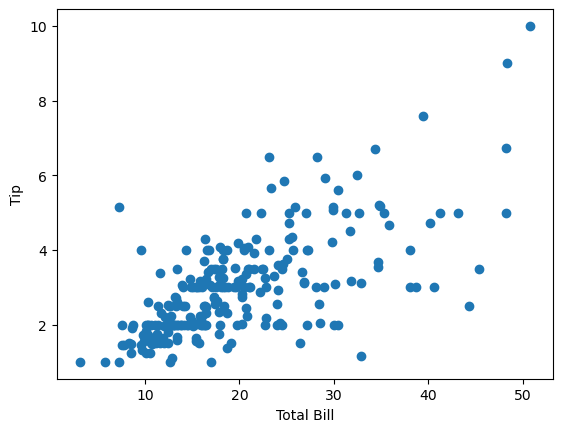

In [3]:
import matplotlib.pyplot as plt 

plt.scatter(x = df['total_bill'], y = df['tip'])
plt.xlabel('Total Bill')
plt.ylabel('Tip')

plt.show()


### Calciuating distance

Using the regression method of KNN we are going to try to predict a how much a person tips based off how much their total bill. To do so first we define the total bill, and calculate the distance of this bill from all other bills using eucledian distance. 

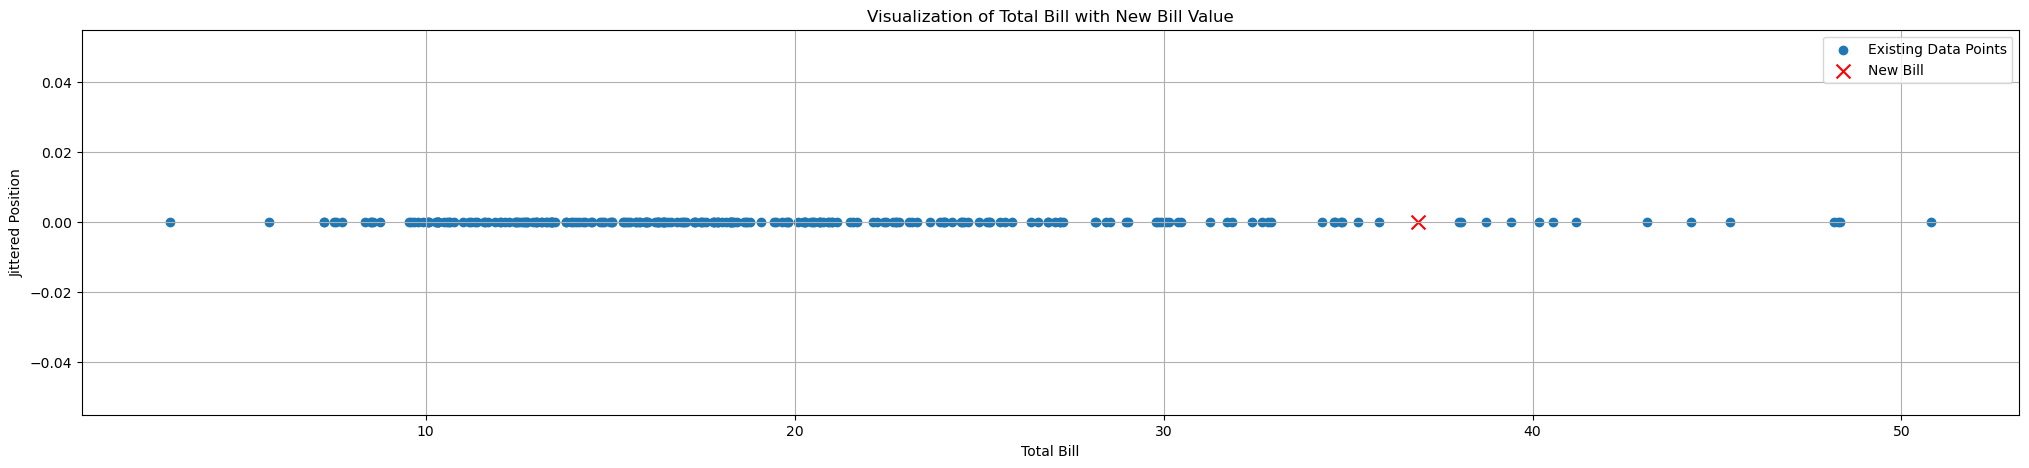

In [31]:
import numpy as np 

X = df['total_bill']
y = df['tip']

new_bill = 36.89

# Add a small random jitter to the y-axis for visualization purposes
y_jitter = np.random.normal(0, 0.0, size=len(X))  # Small random noise


plt.figure(figsize= (25,5))
plt.scatter(X, y_jitter, label='Existing Data Points')
plt.scatter(new_bill, 0, color='red', label='New Bill', marker='x', s=100)

plt.xlabel('Total Bill')
plt.ylabel('Jittered Position')
plt.title('Visualization of Total Bill with New Bill Value')
plt.legend()
plt.grid(True)
plt.show()



Eucledian distance can be calculated using the following formula: 

$
{d(A,B)} = \sqrt{({x_2} - {x_1})^2 + ({y_2} - {y_1})^2}
$

When our dataset has multiple features (dimensions), we generalize this formula to compute the distance between two points as follows: 

$
{d(A,B)} = \sqrt{\sum_{i=1}^2 ({A_i} - {B_i})^2}
$

Where:
- $n$ is the number of features in the dataset.
- ${A_i}$ and ${B_i}$ are the feature values of points  $A$ and $B$ for the $i$-th feature

In [39]:

distances = np.sqrt((X- new_bill) ** 2)

### Find the Closest K Neighbors

Once we've calculated the distances between the new point and all data points, we sort these distances in ascending order. Then we select the indices of the smallest $K$ distances to find the nearest neighbors.

$K$ Is  a hyper-parameter, you define it beforehand in order to determing how many points in your original daapoint you want to use to compare and make a prediction of the new value. 

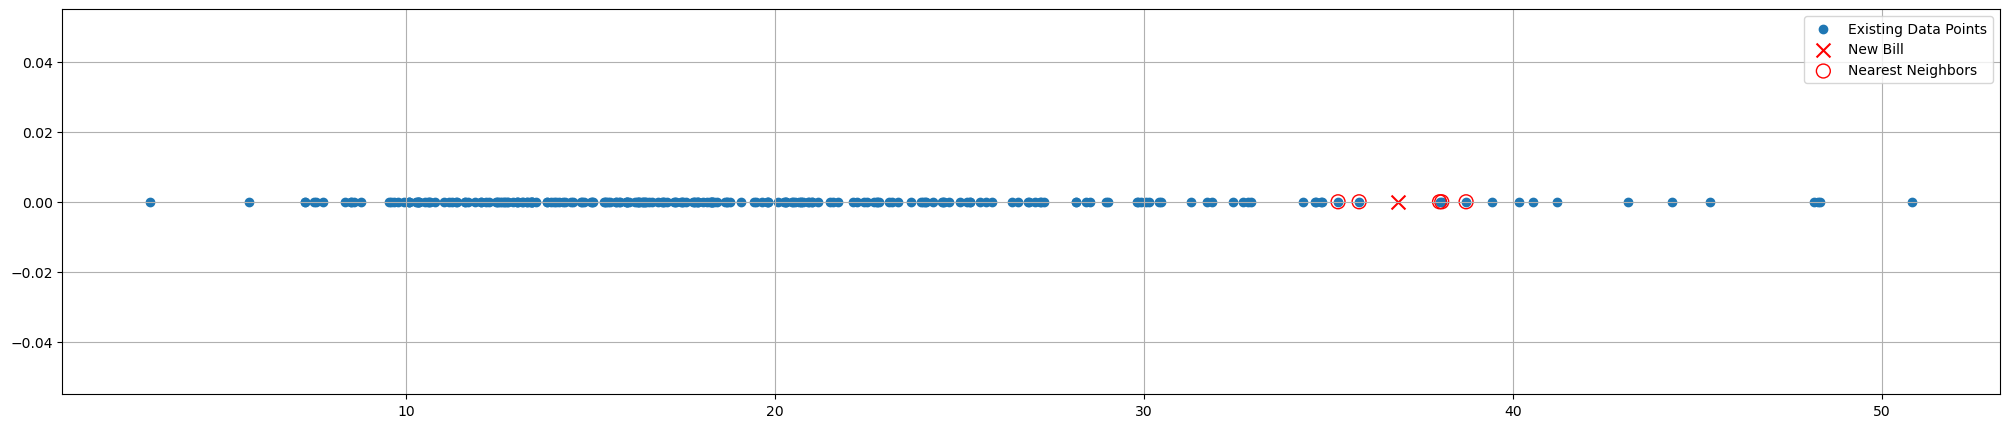

In [46]:
# Set the value of K
K = 5 

# Find the indices of the K nearest neighbors
nearest_neighbors_indices = np.argsort(distances)[:K]


plt.figure(figsize= (25,5))
plt.scatter(X, y_jitter, label='Existing Data Points')
plt.scatter(new_bill, 0, color='red', label='New Bill', marker='x', s=100)

# Highlight the K nearest neighbors
plt.scatter(X[nearest_neighbors_indices], y_jitter[nearest_neighbors_indices], 
            facecolors='none', edgecolors='red', s=100, label='Nearest Neighbors')
plt.grid(True)
plt.legend()


### Making Predictions

For a regression task, the prediction $\hat{y}$ is made by taking the average $y$ value of the $K$ nearest neighbors.

$
\hat{y} = \frac{1}{K}\sum_{i=1}^K {y_i}
$

The predicted tip for a total bill of 36.89 is: 3.93


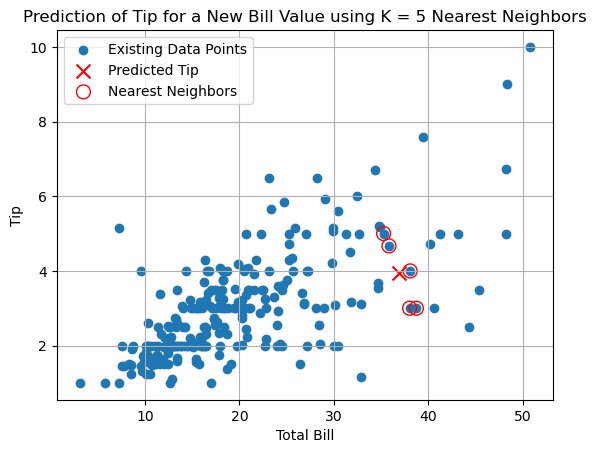

In [48]:
# Retrieve the tip values of the K nearest neighbors
nearest_tips = y[nearest_neighbors_indices]

# Calculate the predicted tip as the average of the nearest tips
predicted_tip = np.mean(nearest_tips)
print(f"The predicted tip for a total bill of {new_bill} is: {predicted_tip:.2f}")


plt.scatter(X, y, label='Existing Data Points')
plt.scatter(new_bill, predicted_tip, color='red', label='Predicted Tip', marker='x', s=100)
plt.scatter(X[nearest_neighbors_indices], y[nearest_neighbors_indices], 
            facecolors='none', edgecolors='red', s=100, label='Nearest Neighbors')

plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title(f'Prediction of Tip for a New Bill Value using K = {K} Nearest Neighbors')
plt.legend()
plt.grid(True)
plt.show()
